In [ ]:
import os
import scipy.io
import numpy as np
import keras
from keras.layers import LSTM, Dropout, Dense
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
imf_all = np.zeros(1500)
for sub in range(1,2):
    for r in ['rest','task']:
        if r == 'rest':
            rt = 'r'
        else:
            rt = 't'
        print("subject",sub,'in',r, "mode")
        dir_path = 'H:\MTech_Final_Poject\MTech_Final_Project\EEG_Signal_Project\decomposition\subject.'+str(sub)+'\s'+str(sub)+'_'+r+'\dec_out'
        count = 0
        for path in os.scandir(dir_path):
            if path.is_file():
                count +=1
        for i in range(1,((count-1)//2)):
            print("segment",i)
            name = 'H:\MTech_Final_Poject\MTech_Final_Project\EEG_Signal_Project\decomposition\subject.'+str(sub)+'/s'+str(sub)+'_'+r+'/dec_out/s'+str(sub)+ '_'+rt+'_dec_imf_'+str(i)+'.mat'
            mat = scipy.io.loadmat(name)
            mat = mat['imf']
            for chan in range(4):
                for n_imfs in range(6):
                    imf_all = np.vstack((imf_all,mat[0,chan][:,n_imfs]))
imf_all = np.transpose(np.transpose(imf_all[1:3241,:]))

subject 1 in rest mode
segment 1
segment 2
segment 3
segment 4
segment 5
segment 6
segment 7
segment 8
segment 9
segment 10
segment 11
subject 1 in task mode
segment 1
segment 2
segment 3
segment 4
segment 5
segment 6
segment 7
segment 8
segment 9
segment 10
segment 11
segment 12
segment 13
segment 14
segment 15
segment 16
segment 17
segment 18
segment 19
segment 20
segment 21
segment 22
segment 23
segment 24
segment 25
segment 26
segment 27
segment 28
segment 29
segment 30
segment 31
segment 32
segment 33
segment 34
segment 35
segment 36
segment 37
segment 38
segment 39
segment 40
segment 41
segment 42
segment 43
segment 44
segment 45
segment 46
segment 47
segment 48
segment 49
segment 50
segment 51
segment 52
segment 53
segment 54
segment 55
segment 56
segment 57
segment 58
segment 59
segment 60
segment 61
segment 62
segment 63
segment 64
segment 65
segment 66
segment 67
segment 68
segment 69
segment 70
segment 71
segment 72
segment 73
segment 74
segment 75
segment 76
segment 77
segm

In [ ]:
y = np.empty(0)
for sub in range(1,2):
    for r in ['rest','task']:
        if r == 'rest':
            rt = 'r'
        else:
            rt = 't'
        print("subject",sub,'in',r, "mode")
        dir_path = 'H:\MTech_Final_Poject\MTech_Final_Project\EEG_Signal_Project\decomposition\subject.'+str(sub)+'\s'+str(sub)+'_'+r+'\dec_out'
        count = 0
        for path in os.scandir(dir_path):
            if path.is_file():
                count +=1
        if r == 'rest':
            z = np.zeros((((count-1)//2)-1)*24)
        else:
            z = np.ones((((count-1)//2)-1)*24)
        y = np.concatenate((y, z), axis=0)
print(np.shape(y))

subject 1 in rest mode
subject 1 in task mode
(3240,)


In [ ]:
print(np.shape(imf_all))

(3240, 1500)


In [ ]:
data = pd.DataFrame(imf_all)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3240 entries, 0 to 3239
Columns: 1500 entries, 0 to 1499
dtypes: float64(1500)
memory usage: 37.1 MB


In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499
0,20.496634,-10.848439,-14.427741,-2.386107,40.191086,-32.127093,-8.344246,15.514347,12.278369,-19.564941,...,-5.098787,4.260191,0.985726,-2.437008,-2.873016,3.010715,6.095563,-4.697076,-8.348946,1.075461
1,3.127280,-4.089985,-3.963472,3.294470,4.429618,-2.841691,-3.798631,2.093803,3.250295,-1.854595,...,0.615900,0.866313,-0.632933,-1.976218,0.213799,3.120810,0.682098,-3.995497,-1.940890,4.386412
2,1.906064,-2.566786,-3.379562,0.266666,3.076404,1.633321,-1.384327,-2.054196,-0.390231,1.059681,...,0.856265,-1.079009,-1.969727,0.210281,2.741149,1.537164,-2.304230,-3.277391,0.464214,3.803153
3,1.590769,-2.164013,-3.565827,-1.030786,2.559020,3.216502,0.384429,-2.623194,-2.554833,0.206240,...,-1.423533,-1.677173,0.168017,2.212065,1.913930,-0.791451,-2.973356,-1.908388,1.515648,3.479780
4,0.951622,-2.232556,-3.389620,-1.451984,1.721645,3.181618,1.720822,-1.101661,-2.636512,-1.699603,...,-0.961141,0.569036,2.012409,1.833589,-0.197574,-2.415178,-2.633607,-0.350308,2.491047,3.194420


In [ ]:
sequence_length = 10
X = np.zeros([10,1500])
for start in range(len(data)-sequence_length):
    ends = start + sequence_length
    X = np.dstack([X,imf_all[start:ends]])
    print(np.shape(np.swapaxes(np.swapaxes(X,0,2),1,2)))
X_sequence = np.swapaxes(np.swapaxes(X,0,2),1,2)

(2, 10, 1500)
(3, 10, 1500)
(4, 10, 1500)
(5, 10, 1500)
(6, 10, 1500)
(7, 10, 1500)
(8, 10, 1500)
(9, 10, 1500)
(10, 10, 1500)
(11, 10, 1500)
(12, 10, 1500)
(13, 10, 1500)
(14, 10, 1500)
(15, 10, 1500)
(16, 10, 1500)
(17, 10, 1500)
(18, 10, 1500)
(19, 10, 1500)
(20, 10, 1500)
(21, 10, 1500)
(22, 10, 1500)
(23, 10, 1500)
(24, 10, 1500)
(25, 10, 1500)
(26, 10, 1500)
(27, 10, 1500)
(28, 10, 1500)
(29, 10, 1500)
(30, 10, 1500)
(31, 10, 1500)
(32, 10, 1500)
(33, 10, 1500)
(34, 10, 1500)
(35, 10, 1500)
(36, 10, 1500)
(37, 10, 1500)
(38, 10, 1500)
(39, 10, 1500)
(40, 10, 1500)
(41, 10, 1500)
(42, 10, 1500)
(43, 10, 1500)
(44, 10, 1500)
(45, 10, 1500)
(46, 10, 1500)
(47, 10, 1500)
(48, 10, 1500)
(49, 10, 1500)
(50, 10, 1500)
(51, 10, 1500)
(52, 10, 1500)
(53, 10, 1500)
(54, 10, 1500)
(55, 10, 1500)
(56, 10, 1500)
(57, 10, 1500)
(58, 10, 1500)
(59, 10, 1500)
(60, 10, 1500)
(61, 10, 1500)
(62, 10, 1500)
(63, 10, 1500)
(64, 10, 1500)
(65, 10, 1500)
(66, 10, 1500)
(67, 10, 1500)
(68, 10, 1500)
(69

In [ ]:
Y = np.zeros(0)
for start in range(len(data)-sequence_length):
    ends = start + sequence_length
    Y = np.append(Y,y[ends])
y = Y
print(len(y))

3230


In [ ]:
X_sequence = X_sequence[1:,:,:]
print(np.shape(X_sequence), np.shape(y))

(3230, 10, 1500) (3230,)


In [ ]:
model = keras.Sequential()
model.add(LSTM(20, input_shape = (10, 1500)))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy"
              , metrics=[keras.metrics.binary_accuracy]
              , optimizer="adam")

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 20)                121680    
                                                                 
 dropout_7 (Dropout)         (None, 20)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 21        
                                                                 
Total params: 121,701
Trainable params: 121,701
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_sequence, y, test_size=0.20, random_state=42)
print('X_train: ',np.shape(X_train))
print('X_test: ',np.shape(X_test))
print('Y_train: ',np.shape(y_train))
print('Y_test: ',np.shape(y_test))

X_train:  (2584, 10, 1500)
X_test:  (646, 10, 1500)
Y_train:  (2584,)
Y_test:  (646,)


In [ ]:
model.fit(X_train, y_train, batch_size=64, epochs=2)

Epoch 1/2
41/41 [==============================] - 3s 12ms/step - loss: 0.5482 - binary_accuracy: 0.7593
Epoch 2/2
41/41 [==============================] - 0s 12ms/step - loss: 0.2377 - binary_accuracy: 0.9779


In [ ]:
print(np.shape(X_test),np.shape(y_test))

(646, 10, 1500) (646,)


In [ ]:
model.evaluate(X_test, y_test)

21/21 [==============================] - 1s 6ms/step - loss: 0.1496 - binary_accuracy: 0.9814


[0.14960478246212006, 0.9814241528511047]

In [ ]:
y_test_prob = model.predict(X_test, verbose=1)
y_test_pred = np.where(y_test_prob > 0.5, 1, 0)

21/21 [==============================] - 1s 6ms/step


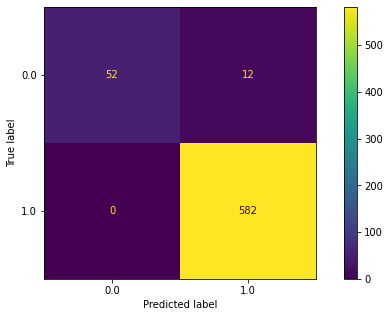

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, ax=ax)

In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.81      0.90        64
         1.0       0.98      1.00      0.99       582

    accuracy                           0.98       646
   macro avg       0.99      0.91      0.94       646
weighted avg       0.98      0.98      0.98       646



In [ ]:
accuracy_score(y_test, y_test_pred)

0.9814241486068112